In [56]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig
import time
import csv
import sys
import plotly.express as px
import matplotlib.ticker as ticker

In [57]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/endingPrice/BTC_KRW_EndingPrice.csv")

In [58]:
df.dtypes

timestamp       object
endingPrice      int64
percentage     float64
dtype: object

In [59]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d', errors='raise')
df.dtypes

timestamp      datetime64[ns]
endingPrice             int64
percentage            float64
dtype: object

In [60]:
# 뒤집기.
df2 = df[::-1]

In [61]:
df2

,timestamp,endingPrice,percentage
166,2018-02-01,10061000,0.000000
165,2018-02-02,9415000,0.000000
164,2018-02-03,9538000,0.000000
163,2018-02-04,8967000,0.000000
162,2018-02-05,7807000,0.000000
...,...,...,...
4,2018-07-13,7075000,10.046233
3,2018-07-14,7119000,10.573661
2,2018-07-15,7192000,14.321249
1,2018-07-16,7475000,6.520084


In [62]:
# 한글 폰트, 그래픽 크기 설정
plt.rcParams["font.family"] = 'DejaVu Sans'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

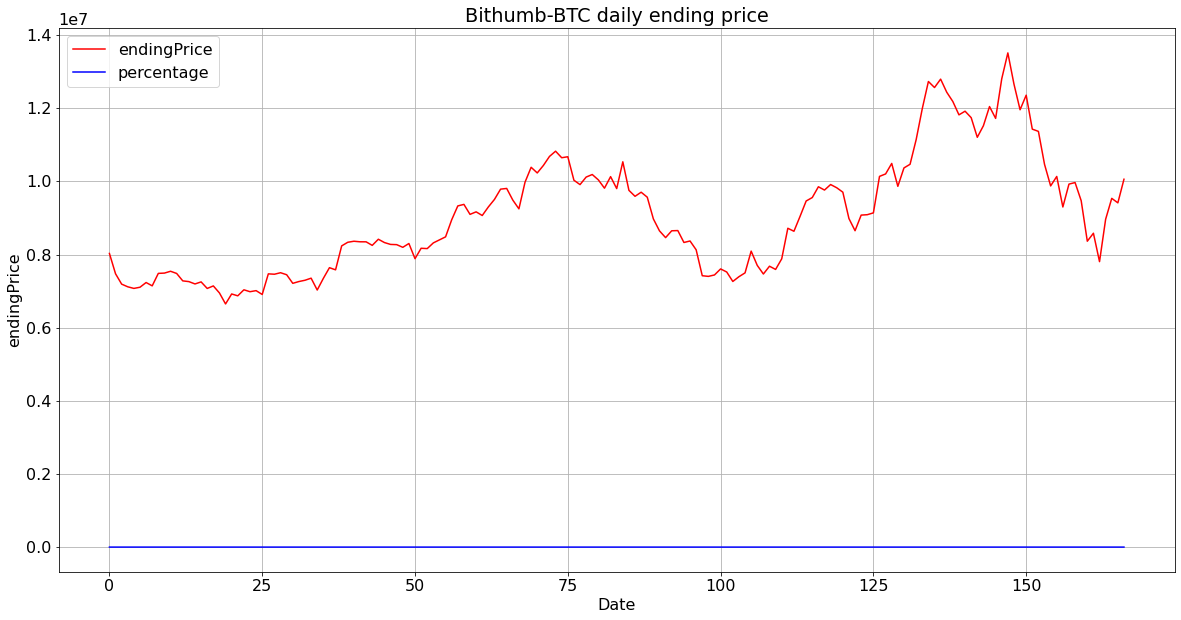

In [63]:
df2['endingPrice'].plot(color = '#ff0000')
df2['percentage'].plot(color = "#0000ff")
plt.grid()
plt.legend()
plt.title("Bithumb-BTC daily ending price")
plt.xlabel("Date")
plt.ylabel("endingPrice")
plt.show()

In [64]:
df2.head()

,timestamp,endingPrice,percentage
166,2018-02-01,10061000,0.0
165,2018-02-02,9415000,0.0
164,2018-02-03,9538000,0.0
163,2018-02-04,8967000,0.0
162,2018-02-05,7807000,0.0


In [65]:
df3 = pd.read_csv("/Users/hamin/bithumb_bot_data/endingPrice/BTC_KRW_EndingPrice.csv", index_col='timestamp', parse_dates=True)

In [66]:
df3.head()

,endingPrice,percentage
timestamp,,
2018-07-17,8031000,0.007566
2018-07-16,7475000,6.520084
2018-07-15,7192000,14.321249
2018-07-14,7119000,10.573661
2018-07-13,7075000,10.046233


NameError: name 'df4' is not defined

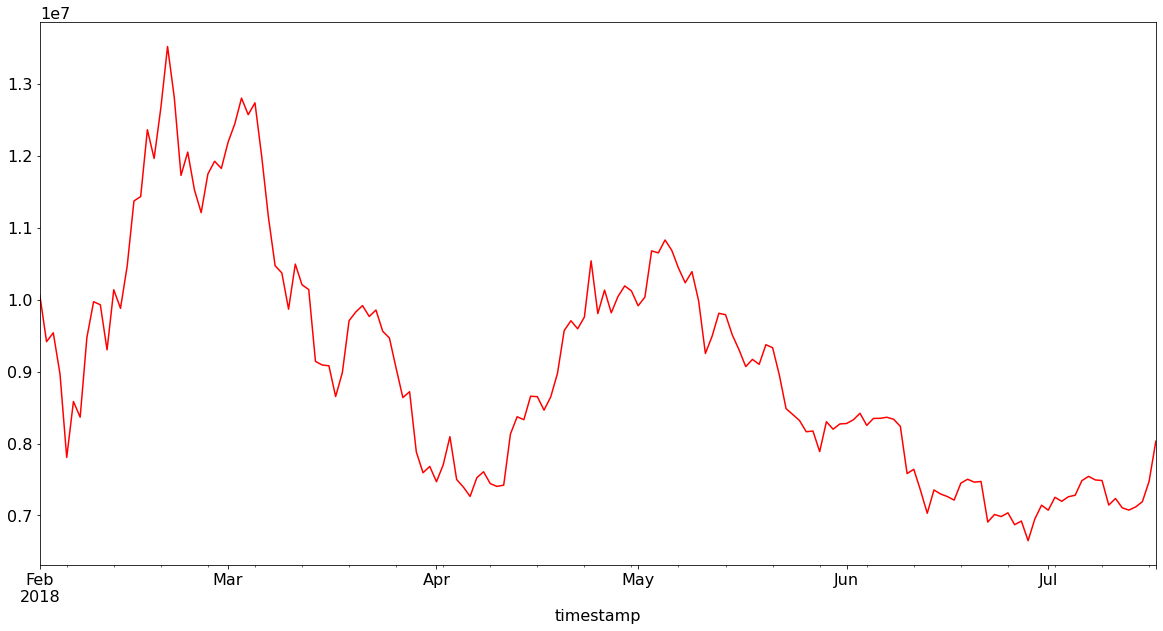

In [67]:
df3['endingPrice'].plot(color = '#ff0000')
df4['percentage'].plot(color = '#0000ff')
plt.grid()
plt.legend()
plt.title("Bithumb-BTC Ending Price and percentage(2018.02.14 ~ 2018.07.17)")
plt.xlabel("Date")
plt.ylabel("Ending Price (10,000,000KRW)")
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Bithumb-BTC-EndingPrice.png', dpi=300)
plt.show()

Text(16, 16, '2018 Bithumb-BTC ending price & transaction percentage graph')

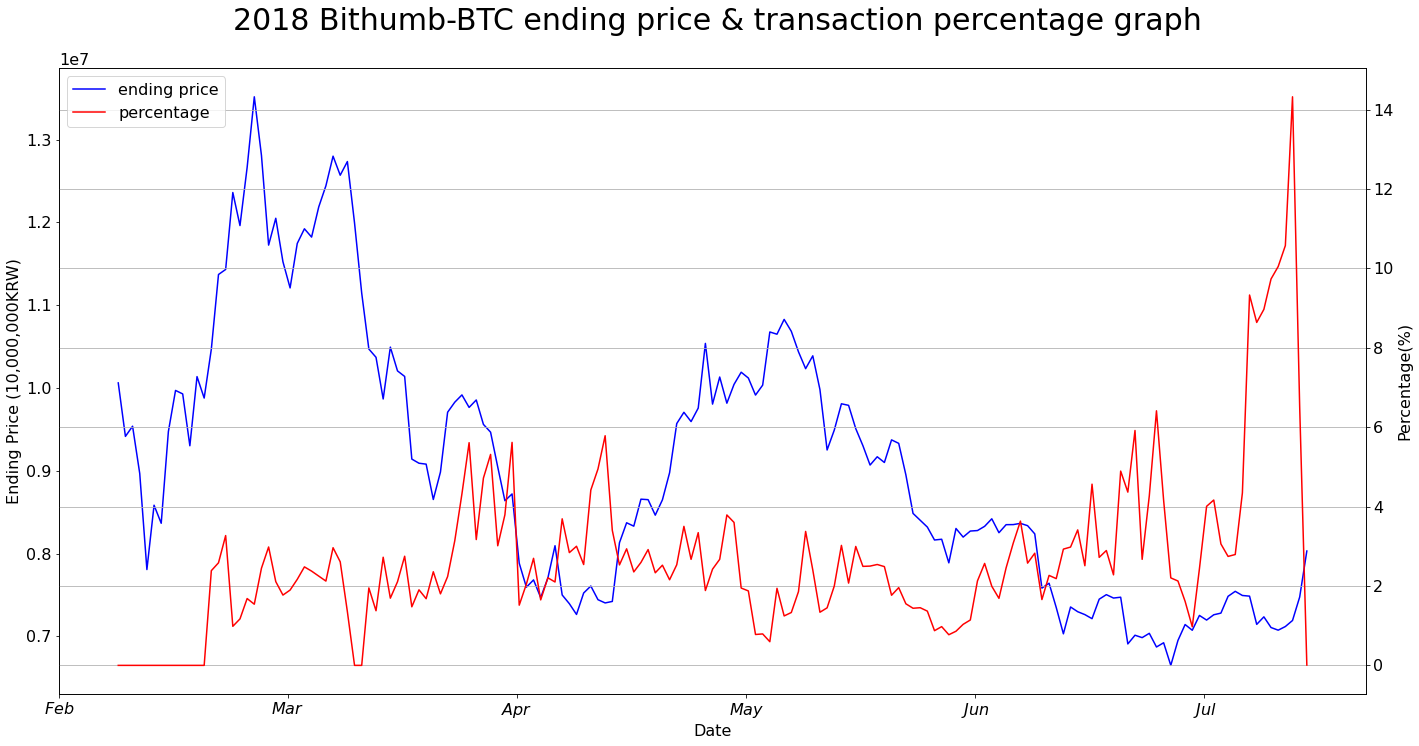

In [92]:
x=df2['timestamp']
y1=df2['endingPrice']
y2=df2['percentage']
# plt.grid()
# # plt.legend()
# plt.title("Bithumb-BTC daily ending price")
# plt.xlabel("Date")
# plt.ylabel("endingPrice")
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1 = ax1.plot(np.arange(len(x)), y1, color='b', label='ending price')
line2 = ax2.plot(np.arange(len(x)), y2, color='r', label='percentage')
# ax1.set_xticks(np.arange(0, 100, step=5), ["x_{:0<2d}".format(x) for x in np.arange(0, 100, step=5)])
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 32))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%10f'))
ax1.set_xticklabels(['$Feb$','$Mar$','$Apr$','$May$','$Jun$','$Jul$'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Ending Price (10,000,000KRW)')
ax2.set_ylabel('Percentage(%)')
# plot legend for all y axis
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=2)

plt.grid(True)

fig.tight_layout()

fig.savefig('Bithumb-BTC2018-ending_price-percentage.png', dpi=1000)
plt.annotate('2018 Bithumb-BTC ending price & transaction percentage graph', xy=(25, 15), xytext=(16, 16), size=30)